In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/data/pokemon.npz')

In [4]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(959, 224, 224, 3)
(240, 224, 224, 3)
(959,)
(240,)


#### MLP로 모델링

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [7]:
from tensorflow.keras.utils import to_categorical


In [8]:
model = Sequential()
# 입력층
model.add(Flatten(input_shape=(224,224,3)))

# 중간층
model.add(Dense(units=450, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))

# 출력층 
# 3개의 카테고리를 했기 때문에 3개의 분류를 해주기 위해서 출력층은 3
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 450)               67738050  
                                                                 
 dense_1 (Dense)             (None, 200)               90200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 3)                 153       
                                                                 
Total params: 67,853,553
Trainable params: 67,853,553
No

In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', # sparse_categorical_crossentropy에 레이블들의 원핫인코딩까지 지원
              optimizer = 'adam',
              metrics = ['accuracy']
              )

In [10]:
h = model.fit(X_train, y_train,
              validation_split=0.2,
              epochs = 30,
              batch_size = 128
              )

Epoch 1/30
6/6 [==============================] - 3s 86ms/step - loss: 19450.1309 - accuracy: 0.3025 - val_loss: 19572.8066 - val_accuracy: 0.3750
Epoch 2/30
6/6 [==============================] - 0s 40ms/step - loss: 17578.3340 - accuracy: 0.3729 - val_loss: 8223.3789 - val_accuracy: 0.3333
Epoch 3/30
6/6 [==============================] - 0s 38ms/step - loss: 7253.5840 - accuracy: 0.3220 - val_loss: 2908.2883 - val_accuracy: 0.4219
Epoch 4/30
6/6 [==============================] - 0s 37ms/step - loss: 4066.9561 - accuracy: 0.4068 - val_loss: 1823.5997 - val_accuracy: 0.3750
Epoch 5/30
6/6 [==============================] - 0s 37ms/step - loss: 2817.2327 - accuracy: 0.3377 - val_loss: 4555.3257 - val_accuracy: 0.3750
Epoch 6/30
6/6 [==============================] - 0s 36ms/step - loss: 3872.6978 - accuracy: 0.4511 - val_loss: 4093.2639 - val_accuracy: 0.3594
Epoch 7/30
6/6 [==============================] - 0s 39ms/step - loss: 2853.3296 - accuracy: 0.4433 - val_loss: 1477.6705 - val

In [11]:
pre = model.predict(X_test)
pre
# 예측값임으로 = 확률 값임

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000

In [13]:
# 답데이터
y_test

array([2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1,
       0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2],
      dtype=int32)

In [14]:
# 정확도 외에 정밀도, 재현율, F1스코어 까지 확인
from sklearn.metrics import classification_report

In [15]:
# classificaation_report(평가용 정답, 예측한 정답)
# argmax : 가장 큰 값의 인덱스를 반환하는 함수
# axis = 1 : pre가 2차원 배열이므로 내부 배열들만(1차원)으로 보겠다는 뜻
print(classification_report(y_test,np.argmax(pre, axis=1)))

              precision    recall  f1-score   support

           0       0.36      0.99      0.52        76
           1       1.00      0.01      0.02        84
           2       0.34      0.12      0.18        80

    accuracy                           0.36       240
   macro avg       0.57      0.37      0.24       240
weighted avg       0.58      0.36      0.24       240



- 기존 MLP로듣 3채널의 컬러 이미지에 배경까지 다양한 데이터를 제대로 분류하는데 어려움이 있음

### CNN 모델 만들기!

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

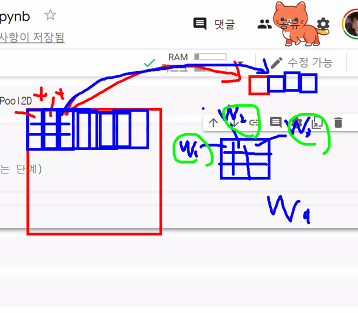

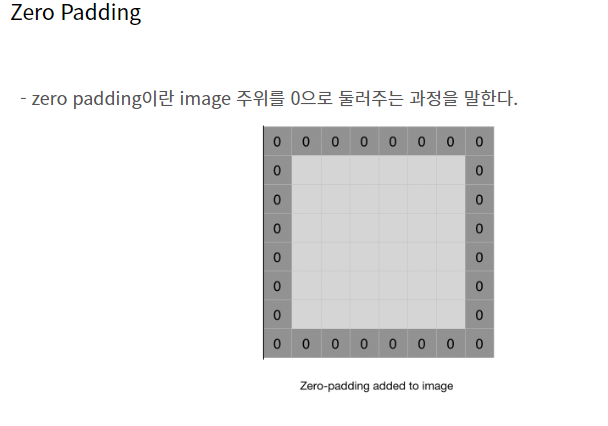

In [17]:
cnn_model = Sequential()
# cnn : 합성곱 신경망 -> 이미지 영상 처리 딥러닝

#1. 특징추출부(Conv - 특징이 되는 정보를 추출하는 단계)
cnn_model.add(Conv2D(input_shape=(224,224,3),
                     # 필터의 개수 : 추출하는 특징의 개수를 설정(필터별로)
                     filters = 128,
                     # 필터의 크기
                     kernel_size = (3,3),
                     # 이미지의 빈공간을 0으로 채워주는 padding
                     # same : 원본 데이터의 크기에 맞게 알아서 패딩을 적용하라 (valid : 패딩 적용 x)
                     padding = 'same',
                     activation = 'relu'
                     ))

#2. 특징 추출부 (Pooling - 불필요한 정보 삭제)
cnn_model.add(MaxPool2D()) # pool_size : 디폴트 값은 2(필터 크기 2 x 2 ) 아래 사진 파란색
# Max Pooling : 정해진 크기 안에서 가장 큰 값만 뽑아낸다.

cnn_model.add(Conv2D(
                     # 필터의 개수 : 추출하는 특징의 개수를 설정(필터별로)
                     filters = 256,
                     # 필터의 크기
                     kernel_size = (3,3),
                     # 이미지의 빈공간을 0으로 채워주는 padding
                     # same : 원본 데이터의 크기에 맞게 알아서 패딩을 적용하라 (valid : 패딩 적용 x)
                     padding = 'same',
                     activation = 'relu'
                     ))

cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(
                     # 필터의 개수 : 추출하는 특징의 개수를 설정(필터별로)
                     filters = 128,
                     # 필터의 크기
                     kernel_size = (3,3),
                     # 이미지의 빈공간을 0으로 채워주는 padding
                     # same : 원본 데이터의 크기에 맞게 알아서 패딩을 적용하라 (valid : 패딩 적용 x)
                     padding = 'same',
                     activation = 'relu'
                     ))

cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(
                     # 필터의 개수 : 추출하는 특징의 개수를 설정(필터별로)
                     filters = 64,
                     # 필터의 크기
                     kernel_size = (3,3),
                     # 이미지의 빈공간을 0으로 채워주는 padding
                     # same : 원본 데이터의 크기에 맞게 알아서 패딩을 적용하라 (valid : 패딩 적용 x)
                     padding = 'same',
                     activation = 'relu'
                     ))

cnn_model.add(MaxPool2D())


# 분류기 (MLP)

#입력층
cnn_model.add(Flatten())
#중간층
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
# 출력층
cnn_model.add(Dense(3, activation='softmax'))

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)     

### Pooling 하는 과정 아래 사진

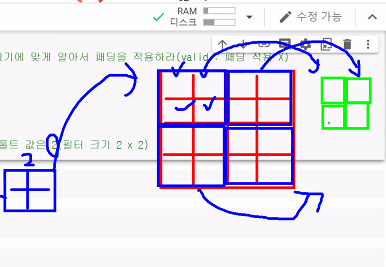

In [18]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['acc']
                  )

In [19]:
cnn_model.fit(X_train, y_train,
              validation_split=0.2,
              epochs=30,
              batch_size = 128 # batch_size = 하나의 소그룹에 속하는 데이터 수를 의미
              )

Epoch 1/30
6/6 [==============================] - 30s 3s/step - loss: 37.2875 - acc: 0.3181 - val_loss: 3.9186 - val_acc: 0.3750
Epoch 2/30
6/6 [==============================] - 6s 1s/step - loss: 2.5185 - acc: 0.3168 - val_loss: 1.3206 - val_acc: 0.3802
Epoch 3/30
6/6 [==============================] - 6s 993ms/step - loss: 1.1840 - acc: 0.4003 - val_loss: 1.0737 - val_acc: 0.3490
Epoch 4/30
6/6 [==============================] - 6s 1s/step - loss: 1.0299 - acc: 0.4889 - val_loss: 1.0117 - val_acc: 0.5312
Epoch 5/30
6/6 [==============================] - 6s 1s/step - loss: 0.9282 - acc: 0.5580 - val_loss: 0.8867 - val_acc: 0.5000
Epoch 6/30
6/6 [==============================] - 6s 1s/step - loss: 0.8127 - acc: 0.6115 - val_loss: 0.8930 - val_acc: 0.5521
Epoch 7/30
6/6 [==============================] - 6s 1s/step - loss: 0.7702 - acc: 0.6493 - val_loss: 0.8399 - val_acc: 0.4948
Epoch 8/30
6/6 [==============================] - 6s 1s/step - loss: 0.7166 - acc: 0.6649 - val_loss: 0.80

In [20]:
pre = cnn_model.predict(X_test)
pre[:5]

array([[1.6248837e-03, 1.6843985e-01, 8.2993525e-01],
       [9.9999952e-01, 4.1805410e-07, 2.1525851e-08],
       [3.2431368e-02, 8.8602595e-02, 8.7896609e-01],
       [2.3252711e-05, 5.5722855e-02, 9.4425386e-01],
       [9.9943191e-01, 5.3154473e-04, 3.6526624e-05]], dtype=float32)

In [21]:
print(classification_report(y_test, np.argmax(pre, axis=1)))

              precision    recall  f1-score   support

           0       0.76      0.82      0.78        76
           1       0.70      0.58      0.64        84
           2       0.56      0.61      0.58        80

    accuracy                           0.67       240
   macro avg       0.67      0.67      0.67       240
weighted avg       0.67      0.67      0.67       240



- 직접 설계한 CNN 모델로는 큰 효과를 보기가 힘듬

### VGG16 모델 전이학습

In [22]:
from tensorflow.keras.applications import VGG16

In [23]:
pt_model = VGG16(include_top=False,
                 weights = 'imagenet',
                 input_shape = (224,224,3)
                 )
# include_top=False : 불러온 모델의 MLP층(분류기)을 사용하지 않고 특성추출부만 사용(=특성추출방식)
# weights = 'imagenet' : 이미지넷에서 학습된 가중치(w)를 그대로 가져옴


58900480/58889256 [==============================] - 0s 0us/step


In [24]:
pt_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
cnn_model2 = Sequential()

# VGG16모델(특성추출부)
cnn_model2.add(pt_model)

# MLP층
cnn_model2.add(Flatten())

# 중간층
cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dense(64, activation='relu'))
cnn_model2.add(Dense(32, activation='relu'))

# 출력층
cnn_model2.add(Dense(3, activation='softmax'))

cnn_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               3211392   
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 3)                 99        
                                                                 
Total params: 17,936,515
Trainable params: 17,936,515


In [26]:
cnn_model2.compile(loss = 'sparse_categorical_crossentropy',
                   optimizer = 'Adam',
                   metrics=['acc']
                   )

In [27]:
cnn_model2.fit(X_train,y_train,
               validation_split=0.2,
               epochs=30,
               batch_size=128
               )

Epoch 1/30
6/6 [==============================] - 63s 7s/step - loss: 17.5592 - acc: 0.3442 - val_loss: 1.1124 - val_acc: 0.4323
Epoch 2/30
6/6 [==============================] - 11s 2s/step - loss: 1.1293 - acc: 0.3403 - val_loss: 1.1499 - val_acc: 0.3125
Epoch 3/30
6/6 [==============================] - 11s 2s/step - loss: 1.1410 - acc: 0.3455 - val_loss: 1.1046 - val_acc: 0.3125
Epoch 4/30
6/6 [==============================] - 11s 2s/step - loss: 1.1095 - acc: 0.3507 - val_loss: 1.1270 - val_acc: 0.2917
Epoch 5/30
6/6 [==============================] - 11s 2s/step - loss: 1.1012 - acc: 0.3351 - val_loss: 1.1072 - val_acc: 0.2865
Epoch 6/30
6/6 [==============================] - 11s 2s/step - loss: 1.1009 - acc: 0.3442 - val_loss: 1.1064 - val_acc: 0.2917
Epoch 7/30
6/6 [==============================] - 11s 2s/step - loss: 1.0901 - acc: 0.3481 - val_loss: 1.1020 - val_acc: 0.2917
Epoch 8/30
6/6 [==============================] - 11s 2s/step - loss: 1.0849 - acc: 0.3481 - val_loss: 

In [28]:
pre = cnn_model2.predict(X_test)

In [29]:
print(classification_report(y_test, np.argmax(pre, axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        76
           1       0.67      0.62      0.64        84
           2       0.62      0.61      0.62        80

    accuracy                           0.68       240
   macro avg       0.68      0.68      0.68       240
weighted avg       0.68      0.68      0.68       240



- 전이학습 모델로 적용해봤지만 특성추출방식으로만은 좋은 결과가 나오지 않았다.
- 미세조정박식까지 적용해보자

In [30]:
pt_model = VGG16(include_top=False,
                 weights = 'imagenet',
                 input_shape = (224,224,3)
                 )

In [31]:
for layer in pt_model.layers :
  print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [32]:
# 미세조정 방식 적용
# 사전학습된 VGG16모델의 충돌 중에서 가장 마지막 conv층을 학습 가능하도록 설정하여 MLP와 같이 학습
for layer in pt_model.layers:
  if layer.name == 'block5_conv3' :
    layer.trainable = True
  else :
    layer.trainable = False

In [33]:
pt_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
cnn_model3 = Sequential()

# VGG16모델(특성추출부)
cnn_model3.add(pt_model)

# MLP층
cnn_model3.add(Flatten())

# 중간층
cnn_model3.add(Dense(128, activation='relu'))
cnn_model3.add(Dense(64, activation='relu'))
cnn_model3.add(Dense(32, activation='relu'))

# 출력층
cnn_model3.add(Dense(3, activation='softmax'))

cnn_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_13 (Dense)            (None, 128)               3211392   
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 3)                 99        
                                                                 
Total params: 17,936,515
Trainable params: 5,581,635
N

In [35]:
cnn_model3.compile(loss = 'sparse_categorical_crossentropy',
                   optimizer = 'Adam',
                   metrics=['acc']
                   )

In [36]:
cnn_model3.fit(X_train,y_train,
               validation_split=0.2,
               epochs=30,
               batch_size=128
               )

Epoch 1/30
6/6 [==============================] - 6s 879ms/step - loss: 12.7790 - acc: 0.4276 - val_loss: 9.3820 - val_acc: 0.4115
Epoch 2/30
6/6 [==============================] - 5s 839ms/step - loss: 3.9209 - acc: 0.5880 - val_loss: 1.4780 - val_acc: 0.6198
Epoch 3/30
6/6 [==============================] - 5s 850ms/step - loss: 0.6566 - acc: 0.8031 - val_loss: 0.8206 - val_acc: 0.7760
Epoch 4/30
6/6 [==============================] - 5s 855ms/step - loss: 0.3184 - acc: 0.8944 - val_loss: 0.5968 - val_acc: 0.7604
Epoch 5/30
6/6 [==============================] - 5s 862ms/step - loss: 0.1639 - acc: 0.9570 - val_loss: 0.6209 - val_acc: 0.7812
Epoch 6/30
6/6 [==============================] - 5s 865ms/step - loss: 0.0956 - acc: 0.9739 - val_loss: 0.7400 - val_acc: 0.7604
Epoch 7/30
6/6 [==============================] - 5s 861ms/step - loss: 0.0640 - acc: 0.9817 - val_loss: 0.6890 - val_acc: 0.7760
Epoch 8/30
6/6 [==============================] - 5s 862ms/step - loss: 0.0451 - acc: 0.9

In [37]:
pre = cnn_model3.predict(X_test)
print(classification_report(y_test, np.argmax(pre, axis=1)))

              precision    recall  f1-score   support

           0       0.92      0.64      0.76        76
           1       0.67      0.73      0.70        84
           2       0.65      0.78      0.70        80

    accuracy                           0.72       240
   macro avg       0.75      0.72      0.72       240
weighted avg       0.74      0.72      0.72       240



- 사전학습모델을 사용하여 전이학습을 진행한 결과,
특성 추출방식만 사용했을 때보다 특성추출방식과 미세조정방식을 같이 적용했을 때 결과가 훨씬 좋아지는 것을 확인 할 수 있었다.
- 데이터의 복잡도에 따라서 같은 형태로 설계된 모델일지라도 정확도에 큰 차이가 나는 것을 확인할 수 있었다.
- 학습정확도는 높은데 비해 검증정확도는 15%이상 차이가 있었기 때문에 과대적합의 느낌을 받았다.

### 데이터 증강(Augmentation) (= 이미지 증식)
- 모델의 과대적합을 방지하기 위해 유사한 이미지 데이터를 증식시켜 학습하는 방법

In [38]:
pt_model2 = VGG16(include_top=False,
                 weights = 'imagenet',
                 input_shape = (224,224,3)
                 )

In [39]:
for layer in pt_model2.layers:
  if layer.name == 'block5_conv3' :
    layer.trainable = True
  else :
    layer.trainable = False

In [40]:
cnn_model4 = Sequential()

# VGG16모델(특성추출부)
cnn_model4.add(pt_model)

# MLP층
cnn_model4.add(Flatten())

# 중간층
cnn_model4.add(Dense(128, activation='relu'))
cnn_model4.add(Dense(64, activation='relu'))
cnn_model4.add(Dense(32, activation='relu'))

# 출력층
cnn_model4.add(Dense(3, activation='softmax'))

cnn_model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_17 (Dense)            (None, 128)               3211392   
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 3)                 99        
                                                                 
Total params: 17,936,515
Trainable params: 5,581,635
N

In [41]:
cnn_model4.compile(loss = 'sparse_categorical_crossentropy',
                   optimizer = 'Adam',
                   metrics=['acc']
                   )

In [42]:
# 이미지를 증식시켜주기 위한 ImageDataGenerator 라이브러리 임포트
from tensorflow.keras.preprocessing.image import ImageDataGenerator

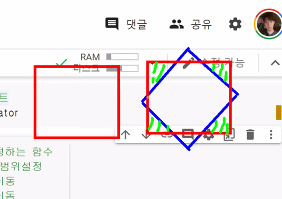

In [46]:
# ImageDataGenerator : 이미지 데이터를 증식시켜주기 위한 조건을 설정하는 함수
aug = ImageDataGenerator(rotation_range = 30,     # 이미지 회전각도 범위설정
                         width_shift_range = 0.2, # 20% 내외로 수평이동
                         height_shift_range = 0.2,# 20% 내외로 수직이동
                         zoom_range = 0.2,        # 0.8 ~ 1.2 배로 축소/확대
                         horizontal_flip = True,  # 수평방향으로 뒤집기
                         fill_mode = 'nearest'    # 이미지가 변형되면서 비는 공간에 가장 근처의 픽셀로 채워주는 명령
                         )

- 이미지 증식 관련 keras 공식 문서 참조 : https://keras.io/ko/preprocessing/image/

In [43]:
len(X_train)

959

In [48]:
cnn_model4.fit(aug.flow(X_train, y_train, batch_size = 128),
               # steps_per_epoch : 한 epoch 당 몇 번 이미지를 증식시켜줄 지 설정
               # 한 epoch 당 7.5번 씩 돌고 끝나게 됨 (128*7.5 = 959장, 즉 총 959장의 새로운 이미지를 epoch마다 생성 )
               steps_per_epoch = len(X_train) / 128,
               epochs = 30 
               )
# lepochs 때 증식된 이미지 959장으로 학습. 2epochs 때 959개가 추가되어서 총 1919개로 학습

Epoch 1/30
7/7 [==============================] - 17s 2s/step - loss: 1.0644 - acc: 0.6257
Epoch 2/30
7/7 [==============================] - 13s 2s/step - loss: 0.6883 - acc: 0.7769
Epoch 3/30
7/7 [==============================] - 12s 2s/step - loss: 0.6368 - acc: 0.7623
Epoch 4/30
7/7 [==============================] - 12s 2s/step - loss: 0.5207 - acc: 0.8113
Epoch 5/30
7/7 [==============================] - 12s 1s/step - loss: 0.5039 - acc: 0.8332
Epoch 6/30
7/7 [==============================] - 12s 1s/step - loss: 0.4643 - acc: 0.8279
Epoch 7/30
7/7 [==============================] - 11s 1s/step - loss: 0.4156 - acc: 0.8498
Epoch 8/30
7/7 [==============================] - 11s 1s/step - loss: 0.3523 - acc: 0.8832
Epoch 9/30
7/7 [==============================] - 11s 1s/step - loss: 0.3731 - acc: 0.8697
Epoch 10/30
7/7 [==============================] - 12s 2s/step - loss: 0.3110 - acc: 0.8916
Epoch 11/30
7/7 [==============================] - 17s 2s/step - loss: 0.3053 - acc: 0.89

In [49]:
pre = cnn_model4.predict(X_test)

print(classification_report(y_test, np.argmax(pre, axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        76
           1       0.82      0.83      0.83        84
           2       0.81      0.84      0.82        80

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240



- 데이터의 수가 적거나 고르지 못한 데이터일 경우, 데이터 증강을 진행한 후 정확도가 더 향상됨 !!